# Get Loss

In [33]:
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [34]:
# paths
OUT = '/home/maxsen/DEEPL/fold/'
out_file = 'log_nucleir101.txt'

# this line parses the output log file (that is created during the training') and takes the loss 
lines_loss = [line for line in open(OUT + out_file) if line.startswith('2019-0') and line.split()[2] == 'maskrcnn_benchmark.trainer' and line.split()[4] == 'eta:']

In [36]:
# lists for the loss, iterations, indexes, learning rate and the loss of the classifier
losses = []
iterations = []
indexes = []
lr = []
loss_classifier = []

days_to_hours = {}
for i in range(11):
    days_to_hours[i] = i * 24
    
for i, one_line in enumerate(lines_loss):
    elements = one_line.split()
    indexes.append(i)
    if len(elements) == 39:
        
        losses.append(float(elements[11]))
        iterations.append(int(elements[9]))
        lr.append(float(elements[35]))
        loss_classifier.append(float(elements[14]))
        
    elif len(elements) == 37:
        
        losses.append(float(elements[9]))
        iterations.append(int(elements[7]))
        lr.append(float(elements[33]))
        loss_classifier.append(float(elements[12]))
        
norm_iterations = [i / 100000 for i in iterations]

In [52]:
def eval_vali(fil):
    print(fil)
    with open(fil) as op:
        all_lines = [i for i in op]
    
    # get the iterations, they are in 2500 iteration steps
    model = [i.split('/')[-1] for i in all_lines if i.startswith('  WEIGHT: /data')]
    models2 = []
    
    # add the final model as 720 000 iterations
    for i in model:
        sd = i.split('_')[-1].split('.')[0]
        if sd == 'final':
            models2.append(720000)
        elif sd == 'trimmed':
            continue        
        else:
            models2.append(int(sd))
            
    # get the average IoU
    av_iou = [float(i.split()[-1]) for i in all_lines if i.startswith('average IoU all')]
    
    # get the average AP 0.5
    av_ap2 = [float(i.split()[-1]) for i in all_lines if i.startswith(' Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100')]

    avs_ap2 = []
    avs_iou = []
    models = []
    
    # initiate all the lists with 0 for the beginning status
    avs_iou.append(0)
    models.append(0)

    for i in range(len(models2)):
        models.append(models2[i])
        avs_iou.append((av_iou[i*2+1] + av_iou[i*2])/2)
        avs_ap2.append((av_ap2[i*2+1] + av_ap2[i*2])/2)

    # find maximum IoU and its iteration and AP
    iou_max = 0
    it_max = 0
    ap2_max  = 0
    
    for i in range(len(avs_iou)):
        if avs_iou[i]>iou_max:
            iou_max = avs_iou[i]
            it_max = models[i]
            ap2_max = avs_ap2[i]
            
    # print the iteration after which the highest IoU was found
    # together with IoU, AP 0.5 and AP 0.95
    print('it', it_max)
    print('iou',iou_max, max(avs_iou))
    print('AP.5', ap2_max)
    
    return models, avs_iou

In [53]:
def plot_eval(file, iterat, loss, save_path = None):
    
    # plot the evaluation, values for the matrix are hardcoded for now
    
    # get the values
    models, avs_iou = eval_vali(file)

    fig, axs = plt.subplots(nrows = 1, ncols = 2, sharex=True)
    
    ax = axs[0]
    ax.axis([-10000, 600000, 0, 1])
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Training Loss')
    ax.plot(iterat, loss)
    
    ax = axs[1]
    ax.axis([-10000, 600000, 0, 1])
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Testing accuracy')
    ax.plot(models, avs_iou, color='g')
    
    fig.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=100)
    plt.show()
       

/home/maxsen/DEEPL/newest_fold/results/out_nuclei_r101.txt
it 262500
iou 0.5724226511386764 0.5724226511386764
AP.5 0.239


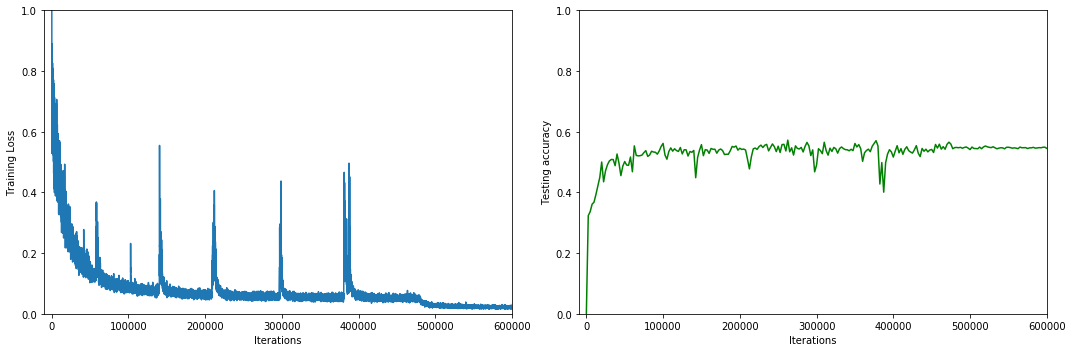

In [54]:
pylab.rcParams['figure.figsize'] = 15, 5

# path of the inference file that is created by running inference on all the intermediate models
inference_path = '/home/maxsen/DEEPL/newest_fold/results/out_nuclei_r101.txt'

plot_eval(inference_path, iterations, losses, save_path='/home/maxsen/DEEPL/newest_fold/nuclei_r101.png')

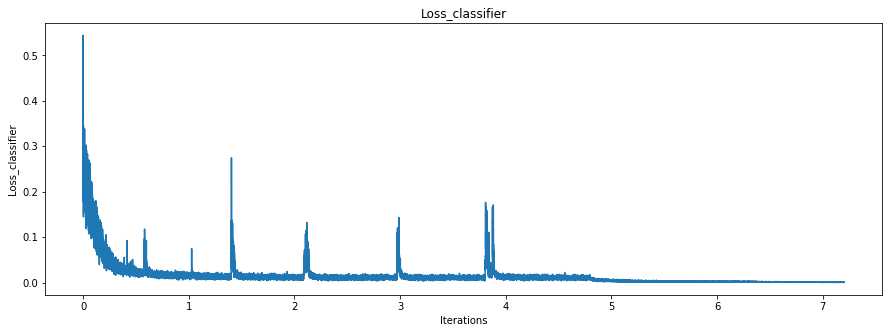

In [26]:
# plot the loss classifier
plt.figure()

plt.plot(norm_iterations, loss_classifier)
plt.ylabel('Loss_classifier')
plt.title('Loss_classifier')
plt.xlim()
plt.xlabel('Iterations')
plt.show()

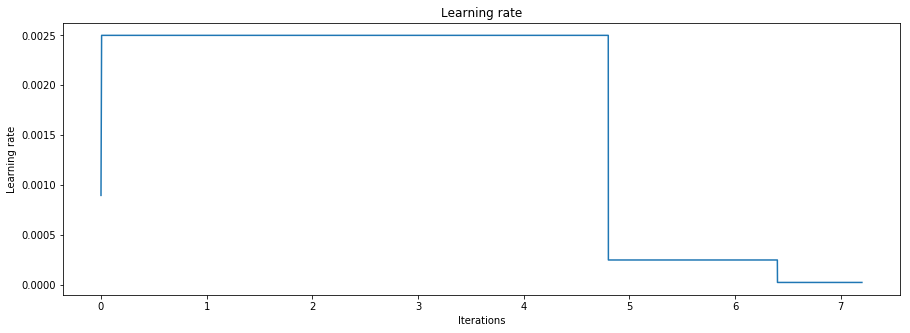

In [27]:
# plot the learning rate
plt.figure()

plt.plot(norm_iterations, lr)

plt.ylabel('Learning rate')
plt.xlabel('Iterations')
plt.title("Learning rate")
plt.show()